In [1]:
using DynamicalSystems, DifferentialEquations, OrdinaryDiffEq, StaticArrays, CairoMakie

### Green space

U0 = 0.23

I0 = -1.45

u0 = SA[1.46577,  0.7359,    0.65397,   0.053783];

### Red space

U0 = 0.25

I0 = -1.45

u0 = SA[1.46577,  0.7359,    0.65397,   0.053783];

### Пачки из трёх спайков

U0 = 0.25

I0 = -1.573
u0 = 1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071

### Пачки из четырех спайков

I0 = -1.5682

### измёнен аттрактор

I0 = -1.54980

### слишком большая пачка

I0 = -1.54500

### бифуркация?

I0 = -1.54490

I0 = -1.54488275

I0 = -1.54488271

u0 = SA[1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071]

In [35]:
τ = 0.013
α = 1.5
J = 3.07
τ_D = 0.15
U0 = 0.3
τ_F = 1
ΔU0 = 0.305
τ_y = 1.8
β = 0.4375
xthr = 0.9
ythr = 0.5

0.5

In [36]:
U(y) = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
σ(x)= 1 / (1 + exp(-20 * (x - xthr)))

σ (generic function with 1 method)

In [37]:
function model(u, p ,t)
    
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    
    du1 = (-E + α * log( 1 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1 - x ) / τ_D - u_ * x * E
    du3 = (U(y) - u_) / τ_F + U(y) * ( 1 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x)
    
    return SVector(du1, du2, du3, du4)
    
end

model (generic function with 1 method)

In [60]:
I0 = -1.741

p = SA[τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0]
u0 = SA[1.46577,  0.7359,    0.65397,   0.053783]
tspan = (0.0, 1000.0)

ds = ContinuousDynamicalSystem(model, u0, p)

println(ds.p)
tr = trajectory(ds, tspan[2], Ttr = tspan[2]/2; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dt = 0.01))

[0.013, 1.5, 0.15, 3.07, 0.3, 0.305, 1.8, 0.4375, 0.9, 0.5, -1.741]


4-dimensional Dataset{Float64} with 1000001 points
 1.61759  0.856967  0.662376  0.110028
 1.6219   0.857002  0.662178  0.110097
 1.62622  0.857033  0.66198   0.110166
 1.63057  0.857063  0.661783  0.110235
 1.63494  0.857089  0.661587  0.110304
 1.63932  0.857114  0.661392  0.110373
 1.64373  0.857136  0.661198  0.110442
 1.64816  0.857156  0.661004  0.110511
 1.65261  0.857173  0.660811  0.11058
 1.65708  0.857188  0.660619  0.110649
 1.66158  0.8572    0.660427  0.110717
 1.66609  0.85721   0.660236  0.110786
 1.67063  0.857218  0.660046  0.110855
 ⋮                            
 2.1726   0.84896   0.655211  0.148184
 2.18455  0.848756  0.655081  0.148218
 2.19673  0.848547  0.654952  0.148251
 2.20913  0.848333  0.654826  0.148283
 2.22177  0.848115  0.6547    0.148316
 2.23466  0.847891  0.654577  0.148347
 2.24781  0.847662  0.654454  0.148379
 2.26122  0.847428  0.654334  0.14841
 2.2749   0.847189  0.654215  0.148441
 2.28887  0.846944  0.654097  0.148471
 2.30313  0.846694  0.6

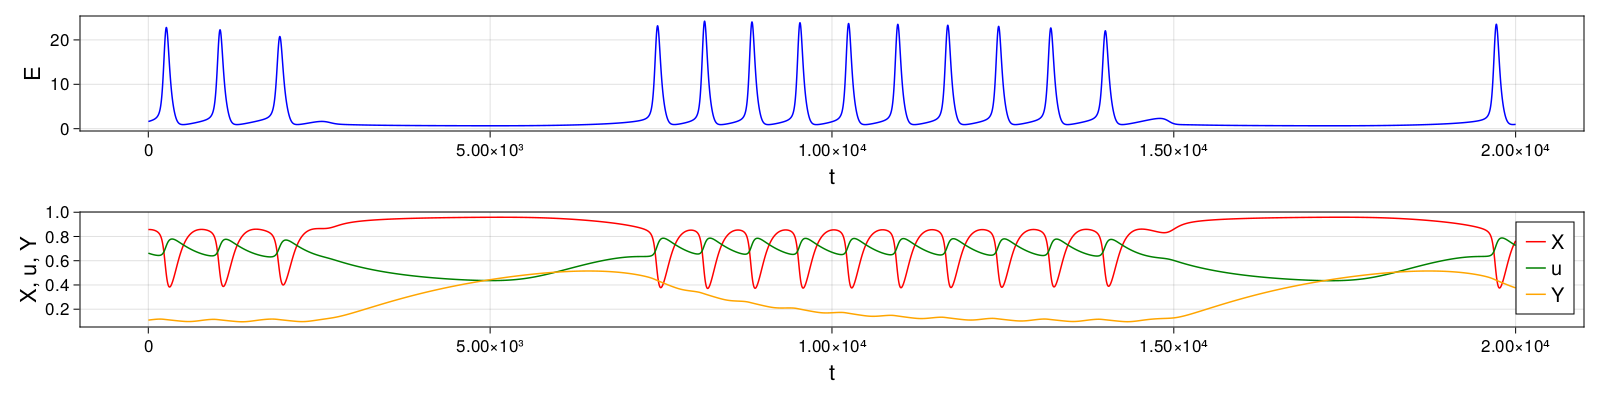

In [61]:
f = Figure(resolution = (1600, 400))

ax1 = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)
ax2 = Axis(f[2, 1], xlabel = "t", ylabel = "X, u, Y", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)

ts, tf = 1, 20000

lines!(ax1, tr[ts:tf, 1], color = "blue", label = "E")

lines!(ax2, tr[ts:tf, 2], color = "red", label = "X")
lines!(ax2, tr[ts:tf, 3], color = "green", label = "u")
lines!(ax2, tr[ts:tf, 4], color = "orange", label = "Y")

axislegend(ax2, labelsize=20)
f

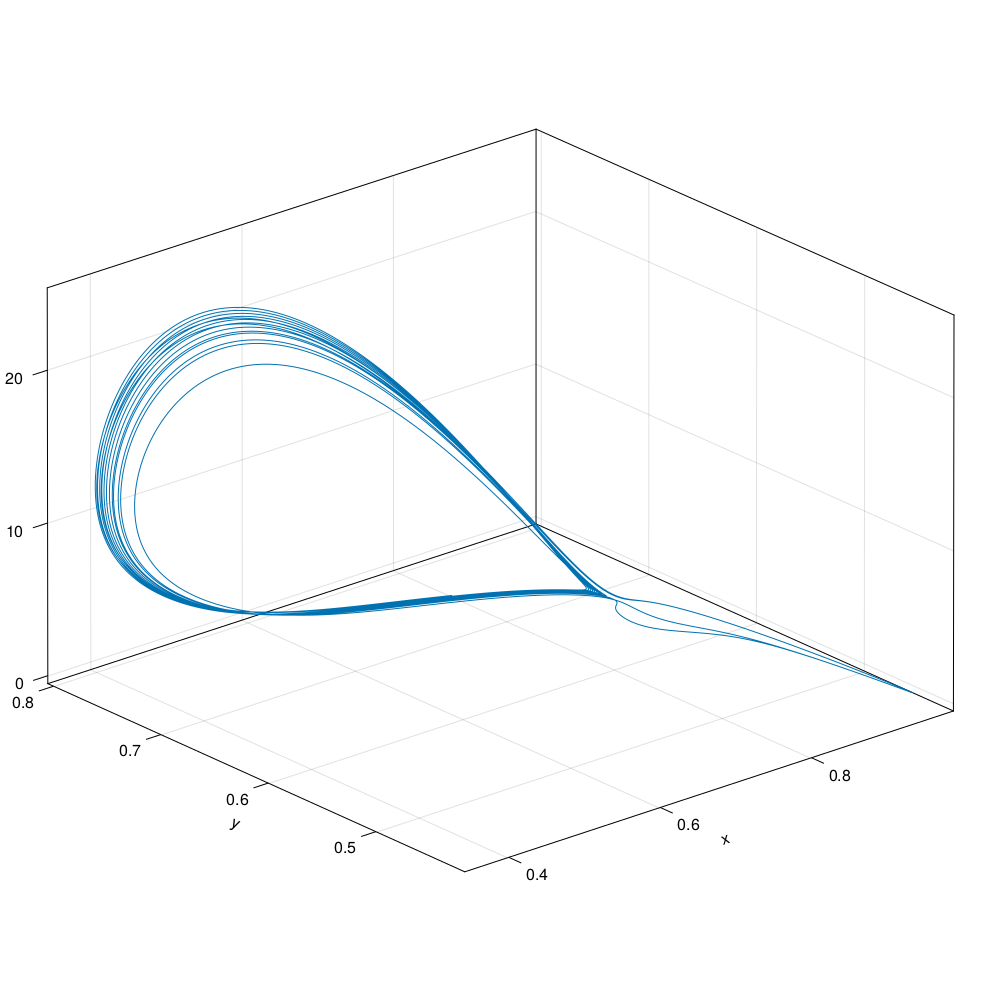

In [62]:
f = Figure(resolution = (1000, 1000))
ts, tf = 1, 20000
ax = Axis3(f[1, 1])
lines!(tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 1)
f

In [65]:
λλ = lyapunovspectrum(ds, tspan[2], Δt = 1, Ttr = tspan[2]/2; diffeq = (alg = RK4(),  adaptive = false, dt = 0.001) )

4-element Vector{Float64}:
   0.056570631471906656
  -0.00022574404093572112
  -3.1436986217135923
 -14.847252283993987

In [9]:
u0 = SA[1.46577,  0.7359,    0.65397,   0.053783];
tspan = (0.0, 2500.0)

(0.0, 2500.0)

In [52]:
p_start =  -1.7418
p_finish = -1.738
p_step = 0.00008
range_p = range(p_start, p_finish, step = p_step)

-1.7418:8.0e-5:-1.73804

In [53]:
length(range_p)

48

In [17]:
array_initial_condition = zeros(length(range_p), 4 )
array_SLE = zeros(length(range_p), 4 );

In [66]:
for (index, p_lc) in enumerate(range_p)
    
   

    u0_lc = SA[1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071]

    
    println("index: $index; I0: $p_lc");flush(stdout)
    println(" u0: $u0_lc ");flush(stdout)
    
    array_initial_condition[index, :] = u0_lc
    
    p_lc = SA[τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, p_lc]
    ds_lc = ContinuousDynamicalSystem(model, u0_lc, p_lc)
    
    tr = trajectory(ds_lc, tspan[2], Ttr = tspan[2]/2; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dt = 0.01))
    
    λλ = lyapunovspectrum(ds_lc, tspan[2], Δt = 1, Ttr = tspan[2]/2; diffeq = (alg = RK4(),  adaptive = false, dt = 0.01) )
    println("LSE: $λλ");flush(stdout)
    array_SLE[index, :] = λλ
    println("  ");flush(stdout)
    
    
end

index: 1; I0: -1.7418
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [-0.31756454777990384, -0.31385690472944233, -11.561034075221492, -15.187392413275564]
  
index: 2; I0: -1.74172
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [-0.3141259312190215, -0.3172276816706845, -11.561697363289813, -15.186302027297021]
  
index: 3; I0: -1.74164
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [-0.31623201901948145, -0.31505378771126064, -11.562360935542344, -15.185211357028654]
  
index: 4; I0: -1.74156
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [-0.20060912596821262, -0.22381238619914268, -9.400316130726887, -15.562669424748416]
  
index: 5; I0: -1.74148
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [0.08909838651778379, -0.0036822892339866413, -3.570887656193290

  
index: 41; I0: -1.7386
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [-0.0005294790812544763, -0.2725331043835016, -0.5556082691409013, -7.951315185759737]
  
index: 42; I0: -1.73852
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [0.00048749091382798603, -0.28753373297154067, -0.5554329051226222, -7.961190287868802]
  
index: 43; I0: -1.73844
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [-0.0010771375064204747, -0.3017813156505485, -0.5555064454244442, -7.969650722815324]
  
index: 44; I0: -1.73836
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [-0.0012563132957769429, -0.3153874263849083, -0.5556142906834911, -7.9771301257549885]
  
index: 45; I0: -1.73828
 u0: [1.3403239669724387, 0.7788950798545725, 0.6941625778210773, 0.03677942307955071] 
LSE: [0.0012556276795974194, -0.3280741207923493, -0.555

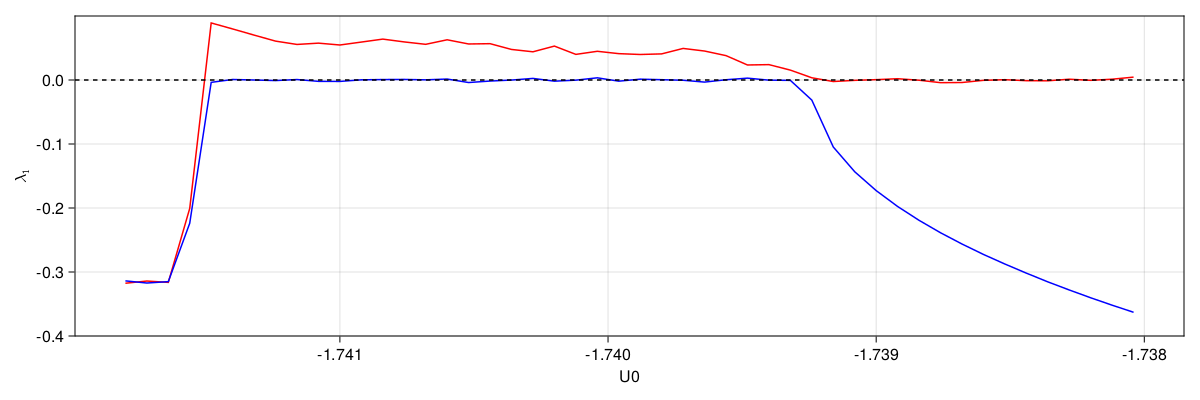

In [67]:
f = Figure(resolution = (1200, 400))
ax = Axis(f[1, 1], xlabel = "U0", ylabel = L"λ_1")

lines!(ax, range_p, array_SLE[:, 1], color = "red")
lines!(ax, range_p, array_SLE[:, 2], color = "blue")

hlines!(ax, 0, range_p, linewidth = 1.5, color = "black", linestyle = :dash)
ylims!(-0.4, 0.1)
f

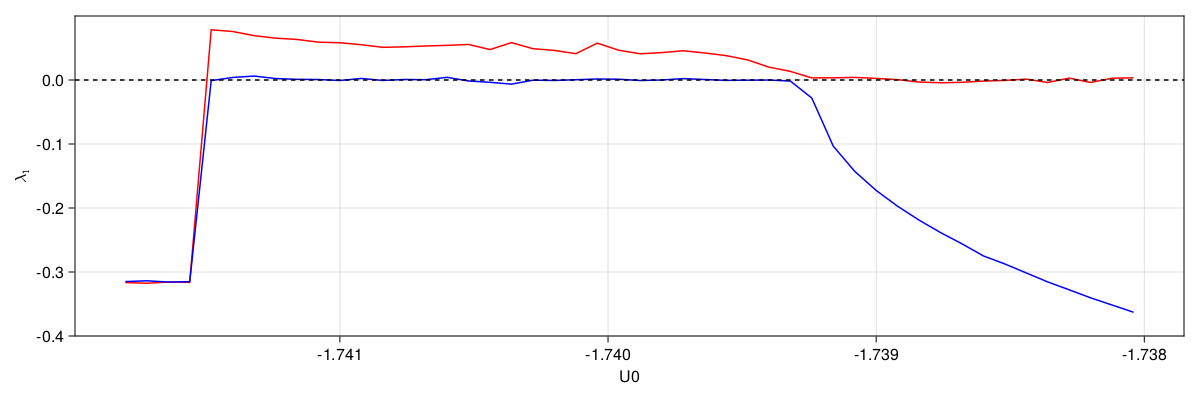

In [55]:
f = Figure(resolution = (1200, 400))
ax = Axis(f[1, 1], xlabel = "U0", ylabel = L"λ_1")

lines!(ax, range_p, array_SLE[:, 1], color = "red")
lines!(ax, range_p, array_SLE[:, 2], color = "blue")

hlines!(ax, 0, range_p, linewidth = 1.5, color = "black", linestyle = :dash)
ylims!(-0.4, 0.1)
f